# A Brief Introduction to pandas

### 1. Getting Started

To begin, we need to import the pandas library. It is common to import it with the alias `pd`.

In [2]:
import pandas as pd

### 2. Creating a DataFrame

A DataFrame is the most common object in Pandas. It is a table with rows and columns, similar to a spreadsheet. You can create a simple DataFrame by giving it a Python dictionary.


In [3]:
# Create a simple DataFrame from a dictionary
data = {
    'name': ['Avi', 'Beni', 'Gadi', 'Dani'],
    'age': [30, 25, 42, 55]
}
df = pd.DataFrame(data)

print(df)

   name  age
0   Avi   30
1  Beni   25
2  Gadi   42
3  Dani   55


### 3. Creating a Series

A Series is a single column of data. You can think of a DataFrame as a collection of Series. You can create a Series from a simple list.

In [4]:
sales = pd.Series([100, 150, 120], index=['2019', '2020', '2021'], name='Product A Sales')

print(sales)

2019    100
2020    150
2021    120
Name: Product A Sales, dtype: int64


### 4. Reading Data (CSV Files)

Most of the time, we will load data from a file. The most common file type is a CSV. We use the `pd.read_csv()` function to load it.

In this case, we will analyze two separate Excel files: `BoysNames.xlsx` and `GirlsNames.xlsx`.

These datasets contain data on the popularity of Jewish baby names in Israel, spanning the years 1948 to 2021, and show the recorded count for each name per year.

An important note regarding the data in these files:
* A single dot (`.`) indicates a count of **zero**.
* Two dots (`..`) indicate a count of **fewer than five**.

In the following chapters, we will use the pandas library to analyze these two datasets.

For our analysis, we will treat **both** of these cases as "missing data," which Pandas calls `NaN` (Not a Number). This will allow us to load the file correctly.



In [5]:
# Define the paths for both Excel files
file_path_boys = "BoysNames.xlsx"
file_path_girls = "GirlsNames.xlsx"

# Read both Excel files into two different DataFrames
names_boys_df = pd.read_excel(file_path_boys)
names_girls_df = pd.read_excel(file_path_girls)

In [6]:
# Print the boys names DataFrame
print(names_boys_df)

       first_name  all_years 1948 1949 1950 1951 1952 1953 1954 1955  ...  \
0             Aba        179    .    6   ..   ..    8   ..    5   ..  ...   
1             Avi       9047   34   49   53   79   92   80   89   97  ...   
2     Avi-Avraham         29    .    .    .    .    .    .    .    .  ...   
3           Avior        523    .    .    .    .    .    .    .    .  ...   
4           Aviel       5734   ..   ..   ..   ..   ..   ..   ..    6  ...   
...           ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1037        Timor        129    .    .    .    .    .    .    .    .  ...   
1038        Telem         67    .    .    .    .    .    .    .    .  ...   
1039          Tam        590    .    .    .    .    .    .    .    .  ...   
1040        Tamir       6247    .   ..    .    5   ..    9    6   12  ...   
1041        Tamar        107    .    .    .    .    .    .    .    .  ...   

     2012 2013 2014 2015 2016 2017 2018 2019 2020 2021  
0      ..   ..   .

> If your file come with index column, you can use the parameter `index_col=0` to tell pandas to use the first column as the index.

### 5. Native Accessors

You can access a column from a DataFrame just like you would get a value from a Python dictionary, using brackets `[]`. This returns the column as a Series.

In [7]:
# Get the 'first_name' column
names = names_boys_df['first_name']
print(names)

0               Aba
1               Avi
2       Avi-Avraham
3             Avior
4             Aviel
           ...     
1037          Timor
1038          Telem
1039            Tam
1040          Tamir
1041          Tamar
Name: first_name, Length: 1042, dtype: object


In [8]:
# Get the first item from that column
first_name = names_boys_df['first_name'][0]
print(f"The first name in the list is: {first_name}")

The first name in the list is: Aba


> You can also use `names_boys_df.first_name`, like accessing an attribute of an object. But this method has some limitations, such as not working if the column name contains spaces or conflicts with existing DataFrame methods...

### 6. Index-based selection (iloc)

Pandas uses two main accessors for advanced selection: `loc` and `iloc`.

`iloc` is used to select data by its **integer position** (like `[0]`, `[1]`, etc.).

In [9]:
# Get the very first row of data (position 0)
first_row = names_boys_df.iloc[0]

print(first_row)

first_name    Aba
all_years     179
1948            .
1949            6
1950           ..
             ... 
2017           ..
2018           ..
2019           ..
2020           ..
2021           ..
Name: 0, Length: 76, dtype: object


In [10]:
# Get the first column (position 0)
# The ':' means "all rows"
first_col = names_boys_df.iloc[:, 0]

print(first_col)

0               Aba
1               Avi
2       Avi-Avraham
3             Avior
4             Aviel
           ...     
1037          Timor
1038          Telem
1039            Tam
1040          Tamir
1041          Tamar
Name: first_name, Length: 1042, dtype: object


In [11]:
# Get the first 3 rows and the first 2 columns
top_left_corner = names_boys_df.iloc[:3, :2]

print(top_left_corner)

    first_name  all_years
0          Aba        179
1          Avi       9047
2  Avi-Avraham         29


In [12]:
last_five = names_boys_df.iloc[-5:]

print(last_five)

     first_name  all_years 1948 1949 1950 1951 1952 1953 1954 1955  ... 2012  \
1037      Timor        129    .    .    .    .    .    .    .    .  ...    5   
1038      Telem         67    .    .    .    .    .    .    .    .  ...   ..   
1039        Tam        590    .    .    .    .    .    .    .    .  ...   ..   
1040      Tamir       6247    .   ..    .    5   ..    9    6   12  ...   65   
1041      Tamar        107    .    .    .    .    .    .    .    .  ...   ..   

     2013 2014 2015 2016 2017 2018 2019 2020 2021  
1037   ..   ..   ..   ..   ..    5   ..   ..   ..  
1038   ..   ..    .   ..   ..    7   ..    8    6  
1039    5   ..    6   ..   ..    5    6    6    7  
1040   43   57   51   40   32   27   15   18   30  
1041   ..    .   ..   ..   ..   ..   ..   ..   ..  

[5 rows x 76 columns]


### 7. Label-based selection (loc)

`loc` is used to select data by its **label** (the index name or the column name).

In [13]:
# Get all the 'first_name'
print(names_boys_df.loc[:, 'first_name'])

0               Aba
1               Avi
2       Avi-Avraham
3             Avior
4             Aviel
           ...     
1037          Timor
1038          Telem
1039            Tam
1040          Tamir
1041          Tamar
Name: first_name, Length: 1042, dtype: object


In [14]:
# Get 'first_name' in row with index 17
print(names_boys_df.loc[17, 'first_name'])

Aviezer


In [15]:
# Get rows 0 through 5, and only specific columns
print(names_boys_df.loc[:5, ['first_name', 1948, 2021]])


    first_name 1948 2021
0          Aba    .   ..
1          Avi   34   10
2  Avi-Avraham    .    .
3        Avior    .   32
4        Aviel   ..  180
5         Aviv   ..  376


> A critical distinction to remember between `.loc` and `.iloc` is how they treat the end-point of a slice. `.iloc` behaves just like standard Python and NumPy slicing, meaning the range is "half-open" and the end-point is **excluded**. For example, `iloc[0:5]` selects items at integer positions 0, 1, 2, 3, and 4.
>
> In contrast, `.loc` is label-based and is **inclusive** of the end-point. A slice like `loc[0:5]` will select all rows with labels from 0 *up to and including* 5. The logic for this is clarity and predictability; when you slice by non-numeric labels, such as dates `loc['Start Date':'End Date']`, you intuitively expect the "End Date" to be included in the result, so `loc` is inclusive by default to avoid confusion.

### 8. Manipulating the Index

Sometimes, the default index (0, 1, 2, 3...) is not very useful. You can use `.set_index()` to make one of your columns the new index. This makes searching with `.loc` very powerful.

In [16]:
# Set the index to 'first_name'
names_indexed_df = names_boys_df.set_index("first_name")

# Now we can use .loc to find a name directly
print(names_indexed_df.loc['Niv'])

all_years    5775
1948            .
1949            .
1950            .
1951            .
             ... 
2017           67
2018           91
2019           88
2020           73
2021           82
Name: Niv, Length: 75, dtype: object


### 9. Conditional Selection

You can select rows of data based on a condition, just like a filter in Excel.

In [17]:
# Select all names with a total count > 60,000
popular_names = names_boys_df.loc[names_boys_df['all_years'] > 60000]
print(popular_names)

    first_name  all_years 1948 1949 1950 1951 1952 1953 1954 1955  ...  2012  \
315      David      66415  240  384  545  711  817  731  674  695  ...  1321   
471      Yosef      61850  291  435  645  801  798  806  725  697  ...  1481   
657      Moshe      62813  308  512  740  845  851  801  754  818  ...  1095   

     2013  2014  2015  2016  2017  2018  2019  2020  2021  
315  1364  1499  1471  1520  1469  1537  1569  1643  1662  
471  1512  1469  1365  1288  1357  1274  1286  1286  1209  
657  1095  1109  1142  1007  1132  1099  1107  1049  1062  

[3 rows x 76 columns]


> We want to perform mathematical operations on our data, like calculating sums and averages for each year. The problem is that our original files used dots (`.` and `..`) to represent zero or low counts. We cannot do math with strings (for example, 5 + '..' will cause a TypeError). Therefore, we are now going to use the .replace() method to find all instances of . and .. and replace them with the number 0. This will convert the columns to a numeric type so we can analyze them correctly.

In [18]:
# Replace all string instances of '.' and '..' with the number 0
# We do this for both DataFrames
names_boys_df = names_boys_df.replace(['.', '..'], 0)
names_girls_df = names_girls_df.replace(['.', '..'], 0)

/var/folders/c5/9_pwd6gn155_gcyb0g505xs00000gn/T/ipykernel_8206/1690327874.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  names_boys_df = names_boys_df.replace(['.', '..'], 0)
/var/folders/c5/9_pwd6gn155_gcyb0g505xs00000gn/T/ipykernel_8206/1690327874.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  names_girls_df = names_girls_df.replace(['.', '..'], 0)


In [19]:
# Combine two conditions with & (AND)
# Find names with > 1500 uses in 2021 AND 2020
popular_recent = names_boys_df.loc[(names_boys_df[2021] > 1500) & (names_boys_df[2020] > 1500)]
print(popular_recent)

    first_name  all_years  1948  1949  1950  1951  1952  1953  1954  1955  \
315      David      66415   240   384   545   711   817   731   674   695   

     ...  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
315  ...  1321  1364  1499  1471  1520  1469  1537  1569  1643  1662  

[1 rows x 76 columns]


In [20]:
# Use .isin() to find names in a specific list
patriarchs = ['Avraham', 'Isaac', "Ya'akov"]
bible_names = names_boys_df.loc[names_boys_df['first_name'].isin(patriarchs)]

print(bible_names)

    first_name  all_years  1948  1949  1950  1951  1952  1953  1954  1955  \
24     Avraham      55248   301   514   625   769   788   760   727   768   
90       Isaac         84     0     0     0     0     0     0     0     0   
496    Ya'akov      48075   276   436   559   679   704   690   626   656   

     ...  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
24   ...   901   913  1026   985   964  1004   967   968  1000   970  
90   ...     0     0     5     0     0     0     0     0     0     0  
496  ...   674   768   726   755   773   859   789   754   770   702  

[3 rows x 76 columns]


### 10. Assigning Data

You can easily create new columns (assign data). You can assign a single value to all rows, or assign a new Series.

In [21]:
# Create a new column 'source' with the same value for all rows
names_boys_df['source'] = 'Israel CBS'

print(names_boys_df)

       first_name  all_years  1948  1949  1950  1951  1952  1953  1954  1955  \
0             Aba        179     0     6     0     0     8     0     5     0   
1             Avi       9047    34    49    53    79    92    80    89    97   
2     Avi-Avraham         29     0     0     0     0     0     0     0     0   
3           Avior        523     0     0     0     0     0     0     0     0   
4           Aviel       5734     0     0     0     0     0     0     0     6   
...           ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
1037        Timor        129     0     0     0     0     0     0     0     0   
1038        Telem         67     0     0     0     0     0     0     0     0   
1039          Tam        590     0     0     0     0     0     0     0     0   
1040        Tamir       6247     0     0     0     5     0     9     6    12   
1041        Tamar        107     0     0     0     0     0     0     0     0   

      ...  2013  2014  2015  2016  2017

In [22]:
# Create a new column by calculating the difference between two columns
# This uses built-in math operators, which are fast
names_boys_df['change_2021_1948'] = names_boys_df[2021] - names_boys_df[1948]

print(names_boys_df[['first_name', 'change_2021_1948']])

       first_name  change_2021_1948
0             Aba                 0
1             Avi               -24
2     Avi-Avraham                 0
3           Avior                32
4           Aviel               180
...           ...               ...
1037        Timor                 0
1038        Telem                 6
1039          Tam                 7
1040        Tamir                30
1041        Tamar                 0

[1042 rows x 2 columns]


### 11. Summary Functions

Pandas has many built-in functions to summarize your data.

  * `.info()` gives a full overview of columns, non-null counts, and data types.
  * `.describe()` gives quick statistics (count, mean, min, max, etc.) for numerical columns.
  * `.mean()`, `.sum()`, `.count()` can be called on any column.

In [23]:
# Get a full summary of the DataFrame
names_boys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   first_name        1042 non-null   object
 1   all_years         1042 non-null   int64 
 2   1948              1042 non-null   int64 
 3   1949              1042 non-null   int64 
 4   1950              1042 non-null   int64 
 5   1951              1042 non-null   int64 
 6   1952              1042 non-null   int64 
 7   1953              1042 non-null   int64 
 8   1954              1042 non-null   int64 
 9   1955              1042 non-null   int64 
 10  1956              1042 non-null   int64 
 11  1957              1042 non-null   int64 
 12  1958              1042 non-null   int64 
 13  1959              1042 non-null   int64 
 14  1960              1042 non-null   int64 
 15  1961              1042 non-null   int64 
 16  1962              1042 non-null   int64 
 17  1963          

In [24]:
# Get statistics for the 'all_years' column
print(names_boys_df['all_years'].describe())

count     1042.000000
mean      2745.244722
std       6958.183942
min          8.000000
25%         86.000000
50%        257.500000
75%       1714.500000
max      66415.000000
Name: all_years, dtype: float64


In [25]:
print(names_boys_df['first_name'].describe())

# Notice that there are 4 different rows with the name variations
# This might seem strange, but it's because in the original Hebrew file
# these were 4 different names with different Hebrew spellings,
# but during translation to English the distinction was lost...

count     1042
unique     973
top       Ilay
freq         4
Name: first_name, dtype: object


In [26]:
# Get the average (mean) number of babies named in 2021
avg_2021 = names_boys_df[2021].mean()
print(f"Average number of babies named (2021): {avg_2021}")

# Get the mean of all_years
all_years_mean = names_boys_df['all_years'].mean()
print(f"Average total number of babies named (all years): {all_years_mean}")

Average number of babies named (2021): 62.17946257197697
Average total number of babies named (all years): 2745.2447216890596


### 12. Maps

A `.map()` is a function that transforms every value in a Series. We often use a `lambda` function to do this quickly.

In [27]:
# Use .map() to create a new Series showing the
# difference from the mean for each name
diff_from_mean = names_boys_df['all_years'].map(lambda x: x - all_years_mean)
print(diff_from_mean)

0      -2566.244722
1       6301.755278
2      -2716.244722
3      -2222.244722
4       2988.755278
           ...     
1037   -2616.244722
1038   -2678.244722
1039   -2155.244722
1040    3501.755278
1041   -2638.244722
Name: all_years, Length: 1042, dtype: float64


### 13. Apply

`.apply()` is similar to `.map()`, but it works on an entire row or column at once, not just one value.

  * `axis=1` runs the function on each **row**.
  * `axis=0` (the default) runs the function on each **column**.

In [28]:
# Create a function that works on a row
def get_name_length(row):
    return len(row['first_name'])

# Use .apply() with axis=1 to run the function on every row
name_lengths = names_boys_df.apply(get_name_length, axis=1)

print(name_lengths)

0        3
1        3
2       11
3        5
4        5
        ..
1037     5
1038     5
1039     3
1040     5
1041     5
Length: 1042, dtype: int64


### 14. Sorting

You can sort your DataFrame by one or more columns using `.sort_values()`. This is very useful for finding the top or bottom items.

In [29]:
# Sort by 'all_years' to find the most popular names of all time
# ascending=False means we sort from highest to lowest
most_popular_all_time = names_boys_df.sort_values(by='all_years', ascending=False)
print(most_popular_all_time)

        first_name  all_years  1948  1949  1950  1951  1952  1953  1954  1955  \
315          David      66415   240   384   545   711   817   731   674   695   
657          Moshe      62813   308   512   740   845   851   801   754   818   
471          Yosef      61850   291   435   645   801   798   806   725   697   
24         Avraham      55248   301   514   625   769   788   760   727   768   
496        Ya'akov      48075   276   436   559   679   704   690   626   656   
..             ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
897          Rogel         11     0     0     0     0     0     0     0     0   
723      Nitzachon         10     0     0     0     0     0     0     0     0   
230          Bobby         10     0     0     0     0     0     0     0     0   
966  Shai-Yehoshua          9     0     0     0     0     0     0     0     0   
492    Yaniv-Moshe          8     0     0     0     0     0     0     0     0   

     ...  2014  2015  2016 

In [30]:
# Sort by '2021' to find the most popular names recently
most_popular_2021 = names_boys_df.sort_values(by=2021, ascending=False)
print(most_popular_2021)

     first_name  all_years  1948  1949  1950  1951  1952  1953  1954  1955  \
315       David      66415   240   384   545   711   817   731   674   695   
212       Ariel      29293    11    17    24    20    19    23    30    31   
542        Lavi      10659     0     0     0     0     0     0     0     0   
471       Yosef      61850   291   435   645   801   798   806   725   697   
211         Ari       6162     0     0     0     0     0    12     0     7   
...         ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
456       Yovav         56     0     0     0     0     0     0     0     0   
459       Yohad         62     0     0     0     0     0     0     0     0   
463      Yulian         41     0     0     0     0     0     0     0     0   
464         Yom        462     5     9    15     7    13    11    13    10   
1041      Tamar        107     0     0     0     0     0     0     0     0   

      ...  2014  2015  2016  2017  2018  2019  2020  2021      

In [31]:
# Sort by multiple columns
# Sort by 2021 (desc) then 2020 (desc)
multi_sort = names_boys_df.sort_values(by=[2021, 2020], ascending=[False, False])
print(multi_sort)

     first_name  all_years  1948  1949  1950  1951  1952  1953  1954  1955  \
315       David      66415   240   384   545   711   817   731   674   695   
212       Ariel      29293    11    17    24    20    19    23    30    31   
542        Lavi      10659     0     0     0     0     0     0     0     0   
471       Yosef      61850   291   435   645   801   798   806   725   697   
211         Ari       6162     0     0     0     0     0    12     0     7   
...         ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
1026        Tav         40     0     0     0     0     0     0     0     0   
1027      Tuval        301     0     0     0     0     0     0     0     0   
1029       Toma         19     0     0     0     0     0     0     0     0   
1037      Timor        129     0     0     0     0     0     0     0     0   
1041      Tamar        107     0     0     0     0     0     0     0     0   

      ...  2014  2015  2016  2017  2018  2019  2020  2021      

### 15. Data Types

Every column in a DataFrame has a data type (`dtype`). Common types are `object` (for strings), `int64` (for integers), and `float64` (for decimal numbers).

In [32]:
# Check the dtype of a single column
print(f"Type of 'all_years': {names_boys_df['all_years'].dtype}")

# Check the dtypes of all columns
print(names_boys_df.dtypes.head())

Type of 'all_years': int64
first_name    object
all_years      int64
1948           int64
1949           int64
1950           int64
dtype: object


### 16. Combining DataFrames (concat)

`pd.concat()` is used to stack DataFrames on top of each other (axis=0) or side-by-side (axis=1). 

We have two files (boys and girls), so we can combine them into one big DataFrame.

First, let's add a new column to each DataFrame before we combine them. This will help us identify the gender later.

In [33]:
# Add a 'gender' column to each table
names_boys_df['gender'] = 'boy'
names_girls_df['gender'] = 'girl'

Now, we can concatenate (stack) them.

In [34]:
# Stack the boys and girls DataFrames on top of each other (axis=0)
# We use ignore_index=True to create a new, clean index (0, 1, 2, 3...)
all_names_df = pd.concat([names_boys_df, names_girls_df], ignore_index=True)

# all_names_df now contains all names, with a 'gender' column
print(all_names_df[['first_name', 'all_years', 'gender']])


       first_name  all_years gender
0             Aba        179    boy
1             Avi       9047    boy
2     Avi-Avraham         29    boy
3           Avior        523    boy
4           Aviel       5734    boy
...           ...        ...    ...
2520     Tif'eret       1339   girl
2521        Tikva       1933   girl
2522       Tereza        100   girl
2523        Tarin         71   girl
2524        Tirza       1139   girl

[2525 rows x 3 columns]


### 17. Groupwise Analysis (groupby)

groupby is one of the most powerful features of Pandas. Now that we have one combined DataFrame (all_names_df) with a 'gender' column, we can use groupby to compare boys and girls.

In [35]:
# Group our new combined DataFrame by the 'gender' column
grouped_by_gender = all_names_df.groupby('gender')

In [36]:
# Get the total (sum) of 'all_years' for boys vs. girls
print(grouped_by_gender['all_years'].sum())

gender
boy     2860545
girl    2738390
Name: all_years, dtype: int64


In [37]:
# We can also aggregate multiple functions at once with .agg()
print(grouped_by_gender['all_years'].agg(['sum', 'mean', 'count']))

            sum         mean  count
gender                             
boy     2860545  2745.244722   1042
girl    2738390  1846.520566   1483


### 19. Merging DataFrames (merge)

`pd.merge()` is used to combine DataFrames based on a shared column.

**Like `concat` (chapter 17), the `merge` function is used to combine two different DataFrames. We will create two new hard-coded DataFrames to demonstrate how to join them on a shared column.**

In [38]:
# Create two DataFrames with a shared 'id' column
employees = pd.DataFrame({
    'id': ['101', '102', '103'],
    'name': ['David', 'Leah', 'Moshe']
})

departments = pd.DataFrame({
    'id': ['101', '102', '103'],
    'dept': ['Sales', 'IT', 'Finance']
})

# Merge them on the 'id' column
merged_df = pd.merge(employees, departments, on='id')
print("employees:\n", employees)
print("\ndepartments:\n", departments)
print("\nmerged_df:\n", merged_df)

employees:
     id   name
0  101  David
1  102   Leah
2  103  Moshe

departments:
     id     dept
0  101    Sales
1  102       IT
2  103  Finance

merged_df:
     id   name     dept
0  101  David    Sales
1  102   Leah       IT
2  103  Moshe  Finance


### 18. Visualization

Pandas has built-in visualization capabilities using `Matplotlib`. You can create simple plots directly from a DataFrame or Series using the `.plot()` method.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

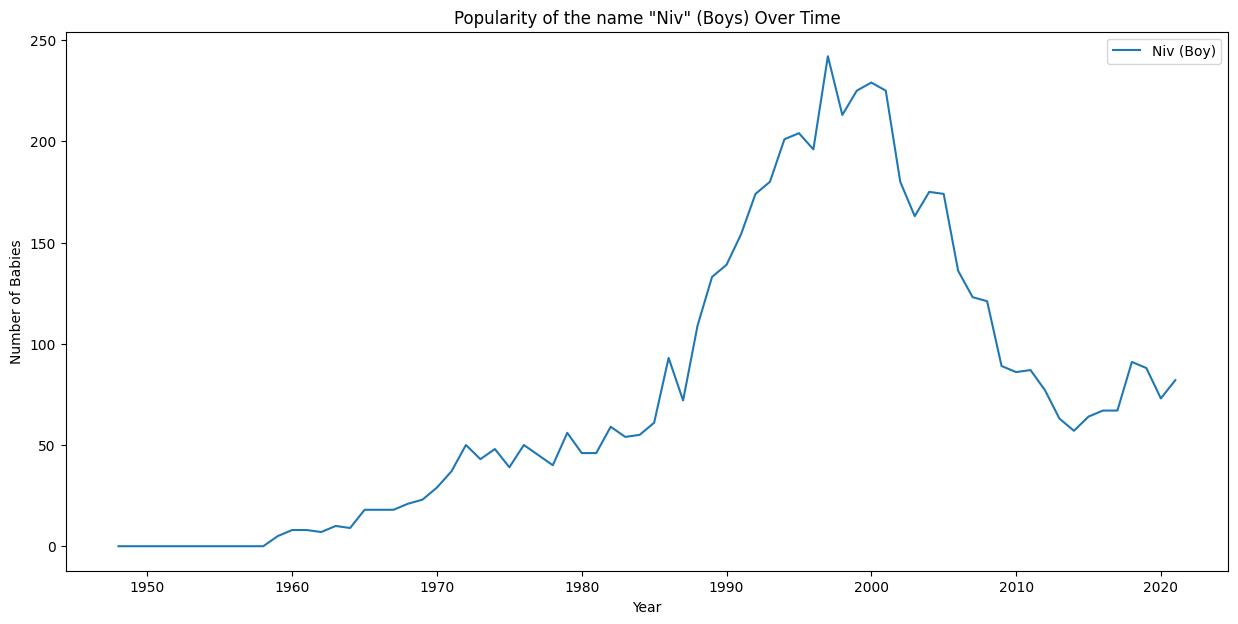

In [42]:
# First, we need to get the data for the name 'Niv' from the boys DataFrame
niv_boy_data = names_boys_df.loc[names_boys_df['first_name'] == 'Niv']

# Get the list of all year columns for our x-axis
year_columns = [year for year in range(1948, 2022)] # 2022 to include 2021

# Get the values (y-axis)
# We use .loc[...].values[0] to get the single row of data as a list
boy_counts = niv_boy_data[year_columns].fillna(0).values[0]

# Create the plot
plt.figure(figsize=(15, 7)) # Make the figure larger
plt.plot(year_columns, boy_counts, label='Niv (Boy)')
# Add titles and labels
plt.title('Popularity of the name "Niv" (Boys) Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.legend() 

Text(0, 0.5, 'Number of Babies')

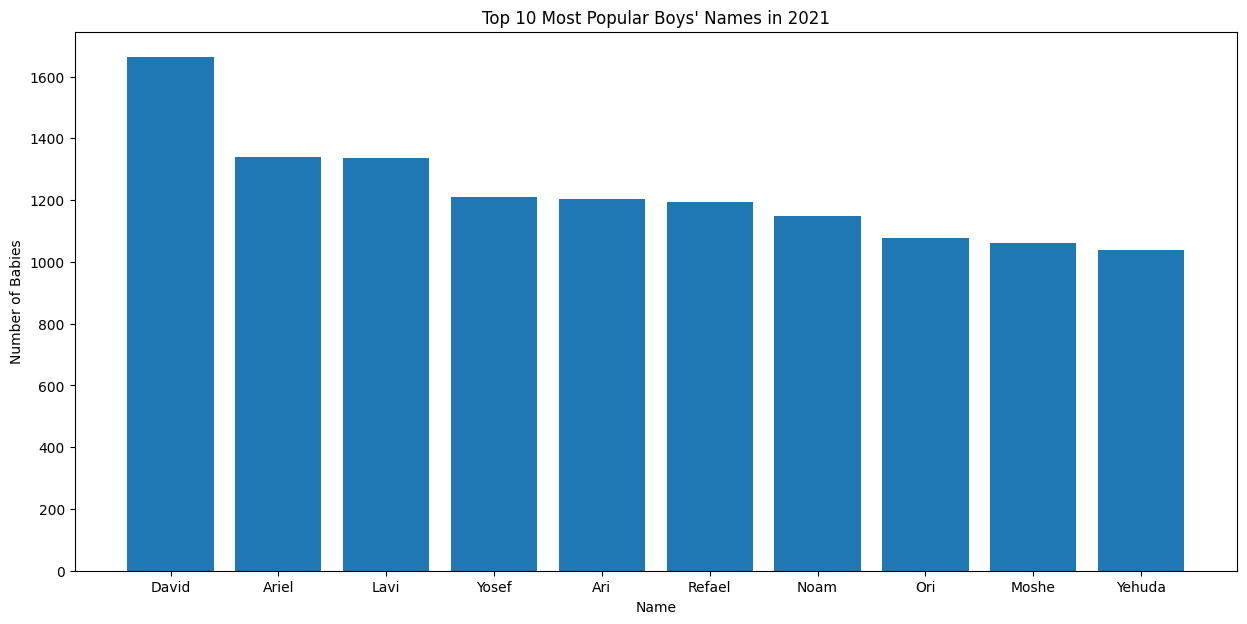

In [41]:
# Sort the DataFrame by the '2021' column in descending order
top_2021_boys = names_boys_df.sort_values(by=2021, ascending=False)

# Select the top 10
top_10 = top_2021_boys.head(10)

# Create the bar plot
plt.figure(figsize=(15, 7))
# We use .bar(x, height)
plt.bar(top_10['first_name'], top_10[2021])

# Add titles and labels
plt.title('Top 10 Most Popular Boys\' Names in 2021')
plt.xlabel('Name')
plt.ylabel('Number of Babies')